In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [96]:
df=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Target looks like classification
Linear Discriminant Analysis training set score: 0.779


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='DEATH_EVENT'>,
 [<Figure size 1200x400 with 6 Axes>,
  array([[<Axes: title={'center': '0.875'}, xlabel='time', ylabel='creatinine_phosph...'>,
          <Axes: title={'center': '0.767'}, xlabel='time', ylabel='serum_creatinine'>,
          <Axes: title={'center': '0.742'}, xlabel='time', ylabel='platelets'>,
          <Axes: title={'center': '0.700'}, xlabel='time', ylabel='age'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 640x480 with 1 Axes>],
 array([[<Axes: title={'center': 'ejection_fraction'}>,
         <Axes: title={'center': 'high_blood_pressure'}>,
         <Axes: title={'center': 'anaemia'}>],
        [<Axes: title={'center': 'smoking'}>,
         <Axes: title={'center': 'sex'}>,
         <Axes: title={'center': 'diabetes'}>]], dtype=object)]

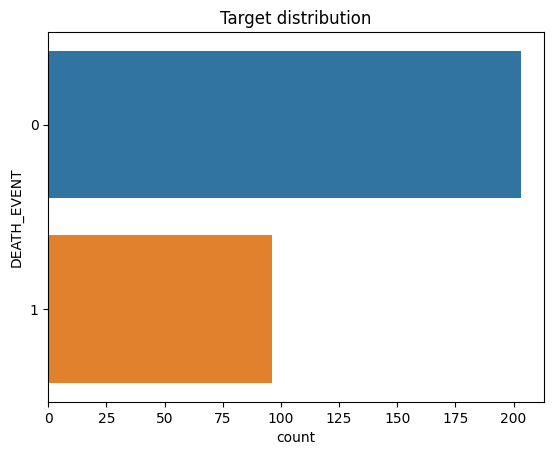

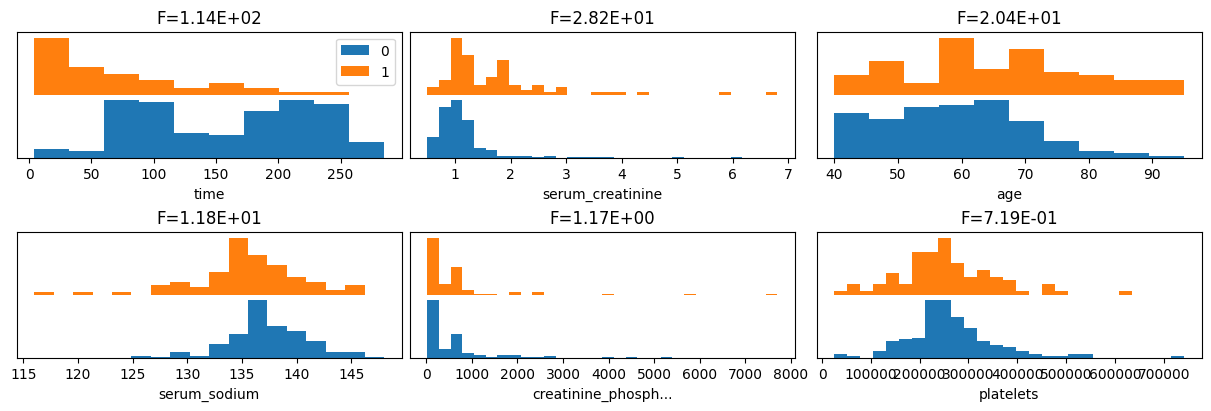

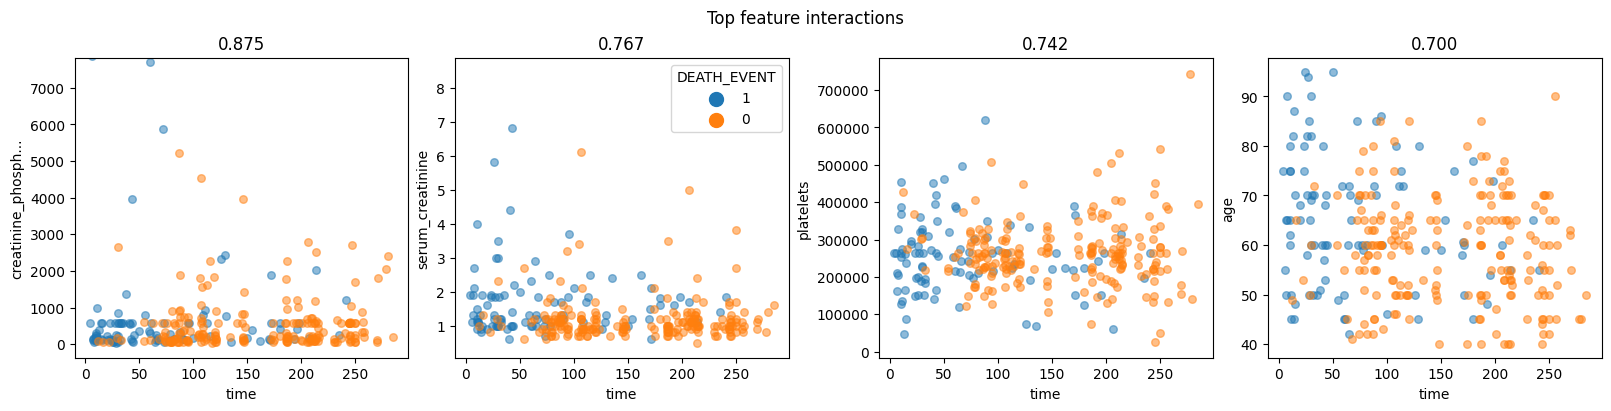

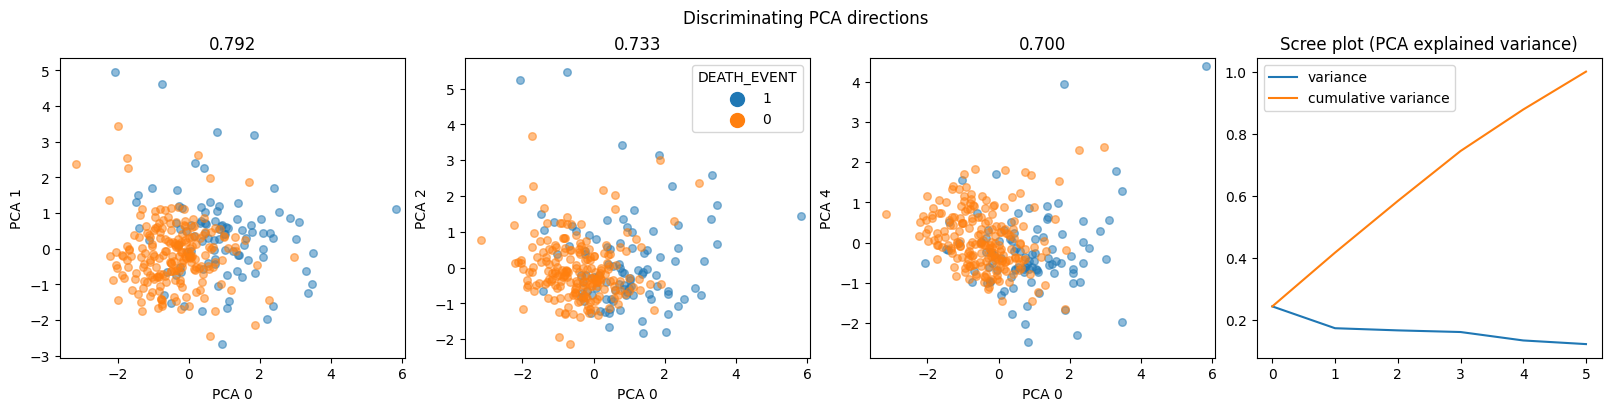

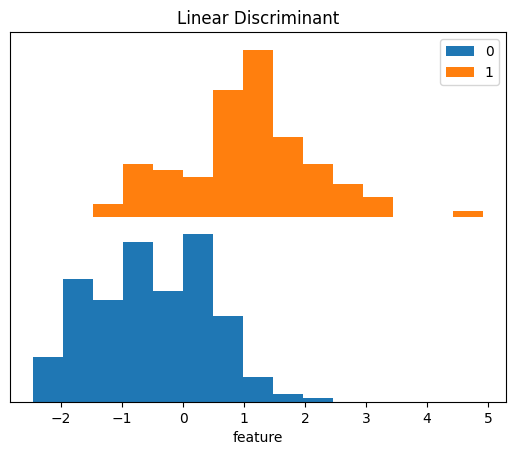

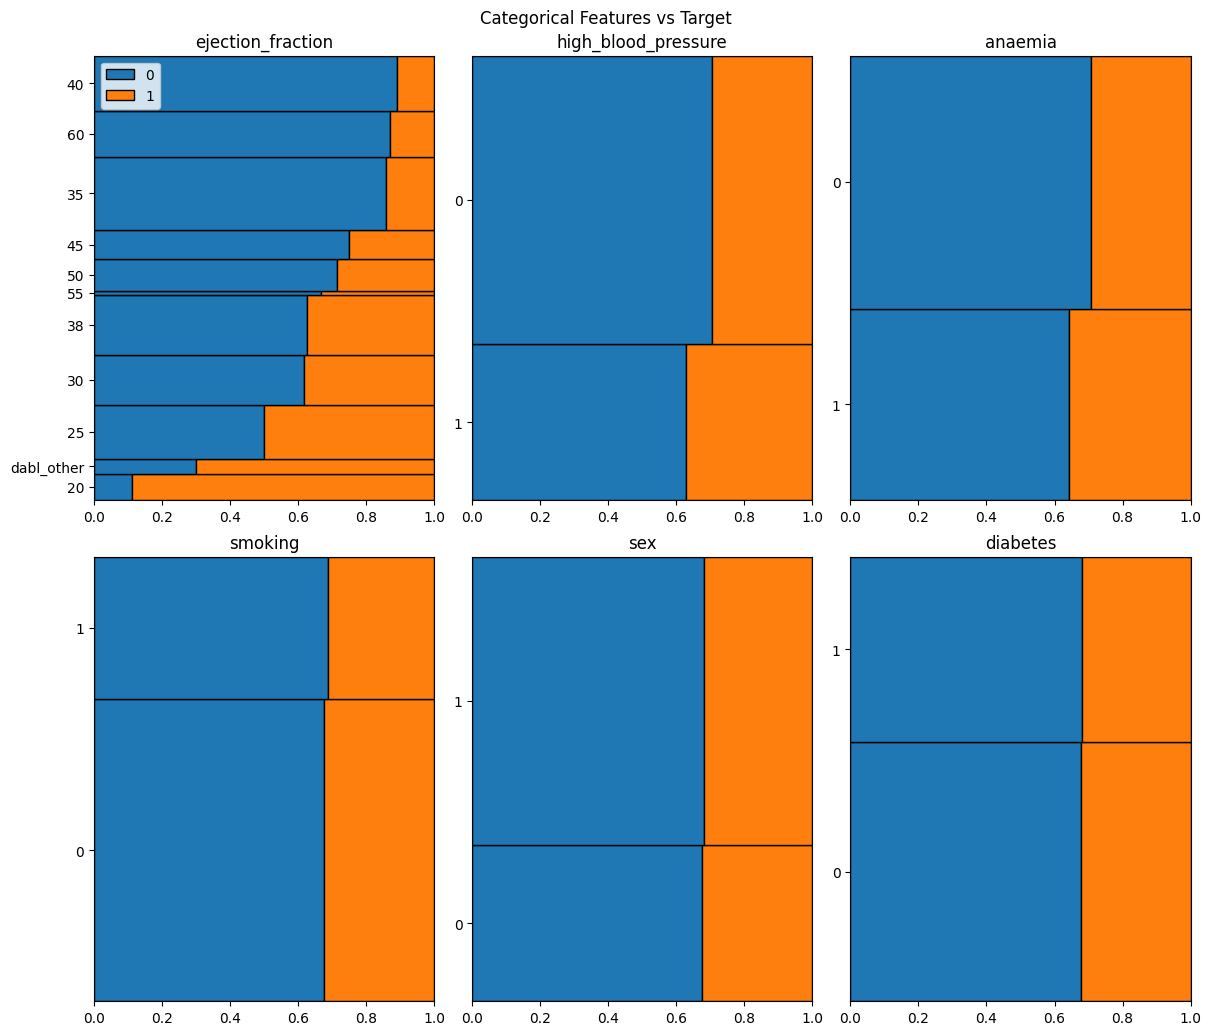

In [97]:
import dabl
dabl.plot(df,'DEATH_EVENT')

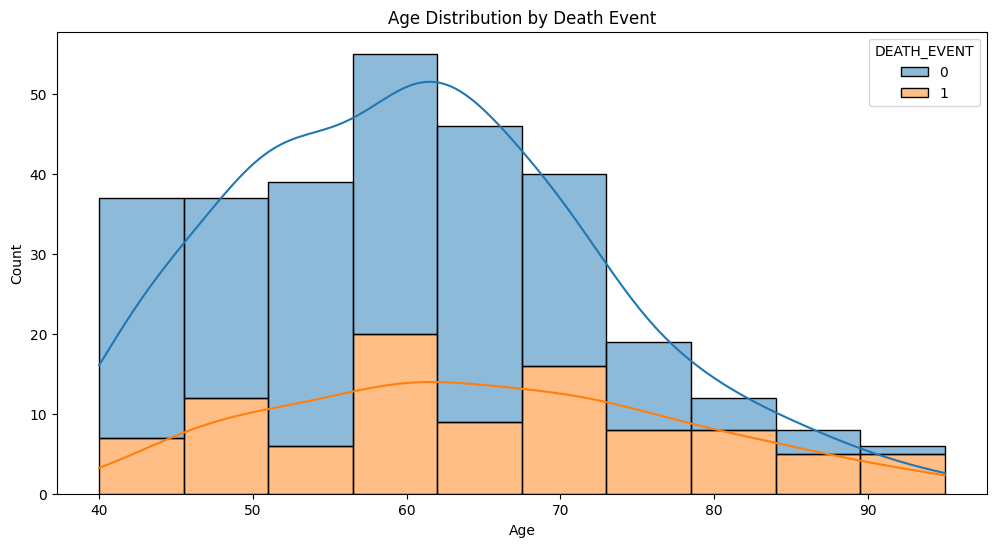

In [98]:
import seaborn as sns


# Create a distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='stack', kde=True)
plt.title('Age Distribution by Death Event')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [99]:
from sklearn.model_selection import train_test_split
df=df[['age','serum_creatinine','ejection_fraction','time','serum_sodium','DEATH_EVENT']]

trainx,testx,trainy,testy=train_test_split(df.drop(['DEATH_EVENT'],axis=1),(df['DEATH_EVENT']),test_size=0.2,random_state=1)


In [100]:
result_acc={}
result_roc={}

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
svm=SVC(kernel="rbf",random_state=0)
svm.fit(trainx,trainy)
val_acc=svm.score(testx,testy)
print(val_acc)
pred=svm.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['svm']=val_acc
result_roc['svm']=val_roc

0.9
0.8105590062111802


In [102]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(trainx,trainy)
val_acc=knc.score(testx,testy)
print(val_acc)
pred=knc.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['kneighbor']=val_acc
result_roc['kneighbor']=val_roc

0.8833333333333333
0.8245341614906833


In [103]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(trainx,trainy)
val_acc=xgb.score(testx,testy)
print(val_acc)
pred=xgb.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['xgb']=val_acc
result_roc['xgb']=val_roc

0.8666666666666667
0.813664596273292


In [104]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(trainx,trainy)
val_acc=lr.score(testx,testy)
print(val_acc)
pred=lr.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['logistic']=val_acc
result_roc['logistic']=val_roc

0.8833333333333333
0.8493788819875776


In [105]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(trainx,trainy)
val_acc=mlp.score(testx,testy)
print(val_acc)
pred=mlp.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['mlp']=val_acc
result_roc['mlp']=val_roc

0.9
0.8354037267080746


In [106]:
from lightgbm import LGBMClassifier

# Define the classifier with desired parameters (optional)
lgb_classifier = LGBMClassifier()  # Learning rate

# Fit the classifier on the data
lgb_classifier.fit(trainx, trainy)
print(lgb_classifier.score(testx, testy))
pred=lgb_classifier.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['lgb']=val_acc
result_roc['lgb']=val_roc

[LightGBM] [Info] Number of positive: 82, number of negative: 157
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343096 -> initscore=-0.649527
[LightGBM] [Info] Start training from score -0.649527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Initialize the model
gbc = GradientBoostingClassifier()

# Fit the model
gbc.fit(trainx, trainy)

# Calculate the validation accuracy
val_acc = gbc.score(testx, testy)
print(val_acc)

# Make predictions
pred = gbc.predict(testx)

# Calculate the ROC AUC score
val_roc = roc_auc_score(testy, pred)
print(val_roc)
result_acc['gradientboosting']=val_acc
result_roc['gradientboosting']=val_roc


0.8333333333333334
0.8167701863354037


In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(trainx,trainy)
val_acc=dtc.score(testx,testy)
print(val_acc)
pred=dtc.predict(testx)
val_roc=roc_auc_score(testy,pred)
print(val_roc)
result_acc['decisiontree']=val_acc
result_roc['decisiontree']=val_roc

0.8333333333333334
0.8167701863354037


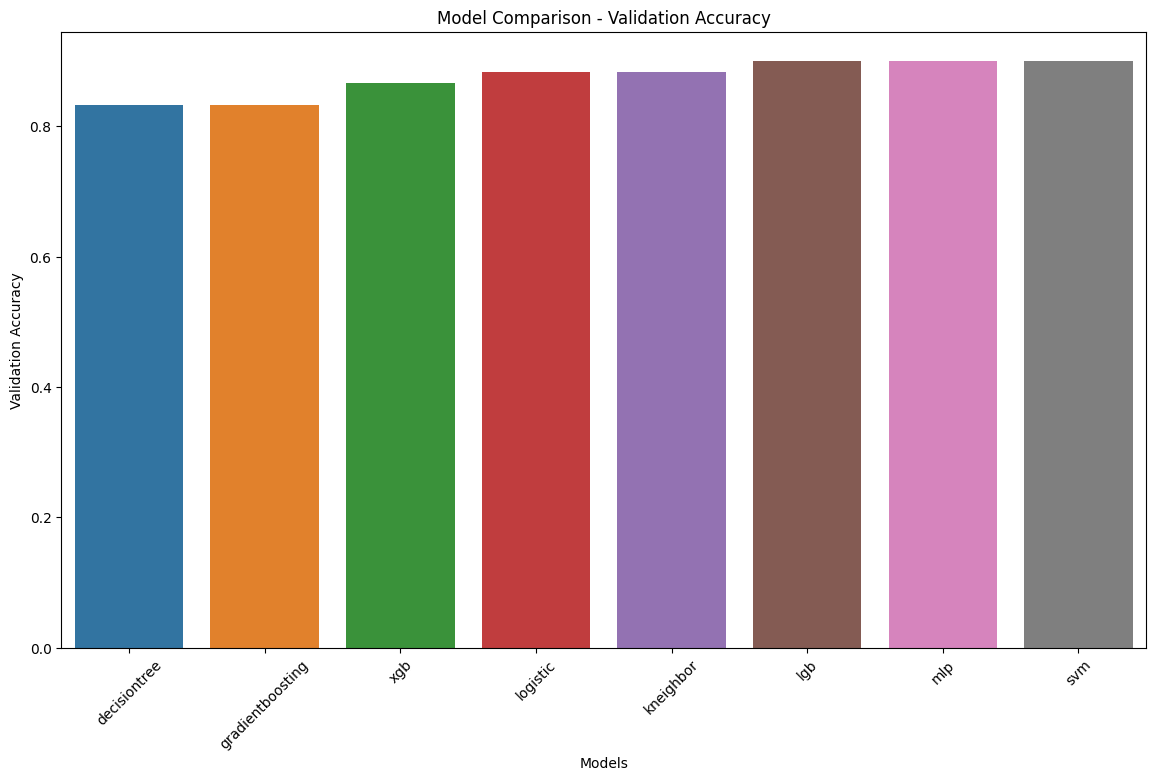

In [109]:
sort_clf = dict(sorted(result_acc.items(), key=lambda x: x[1], reverse=True))

# Get the names and the corresponding scores
clf_names = list(sort_clf.keys())[::-1]
clf_scores = list(sort_clf.values())[::-1]

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=clf_names, y=clf_scores)
plt.xlabel("Models")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.title("Model Comparison - Validation Accuracy")
plt.show()


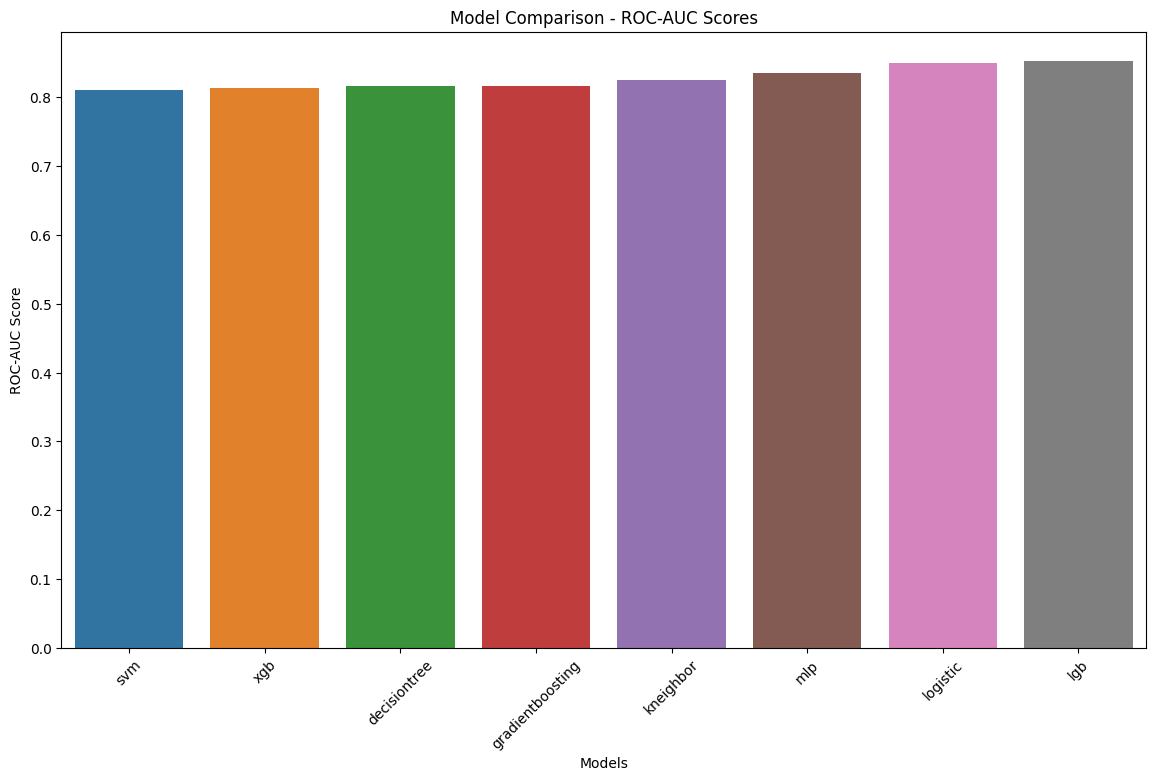

In [110]:
sort_clf = dict(sorted(result_roc.items(), key=lambda x: x[1], reverse=True))

# Get the names and the corresponding scores
clf_names = list(sort_clf.keys())[::-1]
clf_scores = list(sort_clf.values())[::-1]

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x=clf_names, y=clf_scores)
plt.xlabel("Models")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=45)
plt.title("Model Comparison - ROC-AUC Scores")
plt.show()
